In [ ]:
# This was a coding test that I got,where we were given an imbalanced dataset to perform classsification.
#Thank you for reviweing it.

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#reading data
data=pd.read_csv('../data/breastCancer.csv')
data.shape

(1065, 3005)

In [ ]:
data

,ENSG00000238009.5,ENSG00000239945.1,ENSG00000239906.1,ENSG00000241860.5,ENSG00000241599.1,ENSG00000228463.7,ENSG00000237094.10,ENSG00000231709.1,ENSG00000235146.2,ENSG00000239664.2,...,ENSG00000260066.1,ENSG00000249966.1,ENSG00000250417.1,ENSG00000249116.1,ENSG00000249326.1,ENSG00000248994.1,ENSG00000248597.1,ENSG00000249731.1,ENSG00000259757.1,TARGET
0,0.000000,0,0.066580,0.010619,0.0,0.016603,0.058506,0.025905,0.034251,0.0,...,0.457670,0.050529,0.0,2.616618,0.116334,0.754627,0.169331,0.038777,0.031641,0
1,0.005481,0,0.000000,0.035883,0.0,0.147452,0.046222,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,1.694184,0.085048,0.045365,0.000000,0.000000,0.000000,0
2,0.000000,0,0.000000,0.023149,0.0,0.018166,0.073513,0.000000,0.000000,0.0,...,0.047030,0.000000,0.0,1.015551,0.000000,0.129658,0.000000,0.083580,0.000000,0
3,0.056154,0,0.704467,0.063171,0.0,0.159474,0.309376,0.061996,0.041399,0.0,...,0.000000,0.000000,0.0,0.000000,0.016220,0.000000,0.000000,0.000000,0.000000,0
4,0.006670,0,0.000000,0.085850,0.0,0.109156,0.162077,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.361059,0.000000,0.184089,0.000000,0.043807,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.000000,0,0.000000,0.000000,0.0,0.000000,0.012672,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,3.130767,0.036830,0.099515,0.000000,0.000000,0.000000,3
1061,0.043179,0,0.000000,0.020938,0.0,0.317558,0.124022,0.111923,0.050543,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.106333,0.065166,0.000000,0.091958,3
1062,0.196910,0,0.000000,0.022889,0.0,0.093311,0.177519,0.160484,0.000000,0.0,...,0.007856,0.000000,0.0,0.208400,0.014497,0.494752,0.094095,0.122284,0.132247,3
1063,0.008062,0,0.090375,0.152158,0.0,0.172159,0.204781,0.069838,0.000000,0.0,...,0.009928,0.000000,0.0,0.000000,0.000000,0.033532,0.000000,0.000000,1.022836,3


In [ ]:
# class distribution of the last columns -- 'TARGET'
print(data.groupby('TARGET').size())

TARGET
0    191
1     81
2    577
3    216
dtype: int64


As we can see the data seems unbalanced.So, we can apply SMOTE for making the data balanced.
Before applying SMOTE I have applied PCA to get away from the curse of dimensionality.
After that I have done some feature selection. 

In [ ]:
# Split into training and test datasets: 80-20 split
array = data.values
X = array[:,0:len(data.columns)-1]
y = data[['TARGET']]
y = y.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(852, 3004) (852, 1) (213, 3004) (213, 1)


Performing Feature selection and using score_func as f_classif which is computing the ANOVA F-value.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func = f_classif, k = 'all')
fs.fit(X_train, Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
X_train_fs

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1  197  510  607  618  846  980 1211 1619 2183 2569] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[0.03178003, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03439096],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01208877, 0.        , 0.06837251, ..., 0.        , 0.        ,
        0.03250319],
       ...,
       [0.00525774, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.14828733, ..., 0.05057737, 0.        ,
        0.17255884],
       [0.04317937, 0.        , 0.        , ..., 0.06516629, 0.        ,
        0.09195841]])

Selecting top N features

In [ ]:
s = pd.Series(fs.scores_)
s.nlargest(5)

N = 5
columnNames2 = ['score', 'indx', 'name']
sdf = pd.DataFrame(columns = columnNames2)
sdf['score'] = pd.Series(fs.scores_).nlargest(N)
sdf['indx'] = sdf.index.values
for counter in sdf.index.values:
    sdf.at[counter,'name'] = data.columns[counter]
    # df.at['C', 'x'] = 10
sdf

,score,indx,name
1576,416.198778,1576,ENSG00000258910.2
2702,279.801241,2702,ENSG00000248360.6
2238,238.643263,2238,ENSG00000239445.4
1285,210.181905,1285,ENSG00000231367.4
1300,191.268212,1300,ENSG00000231826.4


In [ ]:
columnNames = []
for counter in sdf.index.values:
    columnNames.append(sdf.at[counter,'name']) 
# columnNames

In [ ]:
df = pd.DataFrame(columns = columnNames)
for counter in sdf.index.values:
    # print(sdf.at[counter,'name'])
    df[sdf.at[counter,'name']] = pd.Series(data[sdf.at[counter,'name']])
# df['TARGET'] = pd.Series(data['TARGET'])
df
# df.describe()

,ENSG00000258910.2,ENSG00000248360.6,ENSG00000239445.4,ENSG00000231367.4,ENSG00000231826.4
0,2.562450,0.029926,0.983485,0.446161,0.031561
1,2.735789,0.039612,0.919689,1.691606,0.043826
2,2.707383,0.096038,1.193897,2.290346,0.374735
3,2.473198,0.036183,0.361846,1.785187,1.596191
4,2.034735,0.103733,0.029249,1.543009,4.333071
...,...,...,...,...,...
1060,0.265387,1.139576,0.000000,0.178258,0.000000
1061,0.100445,0.476171,0.111795,0.428418,0.784202
1062,0.073938,1.561187,0.108823,0.387580,0.075687
1063,1.120905,1.540931,0.136296,0.145736,0.053586


After completing feature selection we select the top N features which  are listed above.

Performing SMOTE to deal with the imbalanced data

Class=0, n=577 (25.000%)
Class=1, n=577 (25.000%)
Class=2, n=577 (25.000%)
Class=3, n=577 (25.000%)


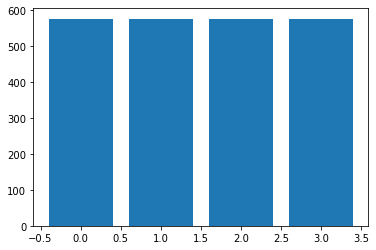

In [ ]:
array = df.values
X = array[:,2:6]
y = pd.Series(data['TARGET'])
y = y.to_numpy()

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# ploting the above
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [ ]:
#normalizing the data
from sklearn.preprocessing import normalize
df3 = pd.DataFrame(normalize(df)) # ,columns = columnNames)
df3['TARGET'] = pd.Series(data['TARGET'])
df3

,0,1,2,3,4,TARGET
0,0.921390,0.010761,0.353636,0.160428,0.011349,0
1,0.817642,0.011839,0.274866,0.505568,0.013098,0
2,0.719717,0.025530,0.317379,0.608854,0.099617,0
3,0.714437,0.010452,0.104527,0.515690,0.461094,0
4,0.404462,0.020620,0.005814,0.306717,0.861322,0
...,...,...,...,...,...,...
1060,0.224226,0.962829,0.000000,0.150610,0.000000,3
1061,0.098125,0.465174,0.109213,0.418524,0.766091,3
1062,0.045761,0.966247,0.067353,0.239880,0.046844,3
1063,0.584822,0.803967,0.071111,0.076036,0.027958,3


In [ ]:
array = df.values
X = array[:,0:4]
y= array[:,4]
#y=y.to_numpy()



As we can see from above and through the graph it is clear that data is now balanced.
After dealing with the imbalanced data, now applying some machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
models.append(('NN', MLPClassifier(solver = 'lbfgs')))
# models.append(('RF',RandomForestClassifier(max_depth=2)))
models.append(('ADB', AdaBoostClassifier(n_estimators = 100)))
# models.append(('QDA',QuadraticDiscriminantAnalysis()))

In [ ]:
# evaluate each model in turn, but only with training data set using 10-fold CV
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
	cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

LR: 0.880260 (0.026806)
CART: 0.720670 (0.036228)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

NB: 0.578687 (0.041337)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

NN: 0.870862 (0.021190)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

ADB: 0.637319 (0.068195)


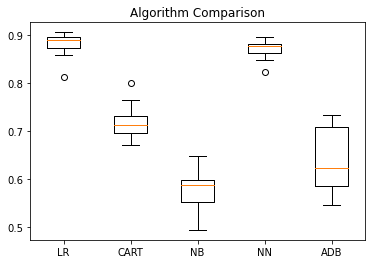

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# Implementing Decision Tree classifier

model = DecisionTreeClassifier(random_state=0, max_depth=2)
model.fit(X_train, Y_train)
predictions=model.predict(X_test)

In [ ]:
# Evaluate predictions -- this is done only on the test set
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7323943661971831
[[42  0  4  0]
 [ 1  5  8  8]
 [ 0  0 89 14]
 [ 0  0 22 20]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       1.00      0.23      0.37        22
           2       0.72      0.86      0.79       103
           3       0.48      0.48      0.48        42

    accuracy                           0.73       213
   macro avg       0.79      0.62      0.64       213
weighted avg       0.76      0.73      0.72       213



The ML methods used are:  LogisticRegression, DecisionTreeClassifier, GaussianNB, MLP Classifier(Neural Network), and AdaBoost Classifier. 
I did outlier removal and PCA(to get away from the curse of dimensionality) but eventually did not include them since they were not affecting the accuracy at all. I believe that since the data comprises of genes so the accuracy might improve by taking differentially expressed genes as features for classification.However, this requires some in depth research on it.